# Project 1: SAT & ACT Analysis

## Problem Statement

>SAT and ACT are two of the most commonly accepted standardised tests used in college applications. In 2015, the lawmakers had voted that Department of Education to take competitive bids for college entrance examinations. Using data for both tests in 2017 and 2018, we want to investigate the correlation amongst the variable of both tests systems. We also want to study any trends and anomalies that might be present in the data, and understand the events that could explain these findings.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [1]:
#Imports:
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code: 
#read_csv and storing csv for both 2017 and 2018 data
sat_2017= pd.read_csv("../data/sat_2017.csv")
act_2017= pd.read_csv("../data/act_2017.csv")


#### 2. Display Data


In [3]:
#Code:
# reading 10 rows of sat_2017
pd.DataFrame(sat_2017).head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
# reading 10 rows of act_2017
pd.DataFrame(act_2017).head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

In [5]:
# Observing the shape of the data 
print("There are %d observation and %d variables in sat_2017 dataframe"%(sat_2017.shape[0],sat_2017.shape[1]))
print("There are %d observation and %d variables in act_2017 dataframe"%(act_2017.shape[0],act_2017.shape[1]))

There are 51 observation and 5 variables in sat_2017 dataframe
There are 52 observation and 7 variables in act_2017 dataframe


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<b>Answer</b>: 

> <b>SAT data</b>

> SAT data has 5 variables
> <li>state (string)    </li>
> <li>participation (string)</li>
> <li>evidence-based reading and writing (float)</li>
> <li>math (integer)</li>
> <li>total (integer)</li>

><b>ACT data</b>
 
> ACT data has 7 variables
> <li>state (string)</li>
> <li>participation (string)</li>
> <li>english (float)</li>
> <li>math (float)</li>
> <li>reading (float)</li>
> <li>science (float)</li>
> <li>composite (float)</li>



#### 4a. Does the data look complete? 

<b>Answer:</b> 
>By observing on the first 10 rows, it seemed that the data is complete. This would need to be further evaluated. The current Participation rates are in string data type, we would need to type cast it for further analyis. There is an additional line in the SAT reported as National Satistics
</p>

#### 4b. Are there any obvious issues with the observations?

What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)


<b>Answer:</b>

>For SAT, the minimum results is 200 and the maximum is 800 marks. When comparing the results, an error was spotted for Minimum results of Math.



In [6]:
sat_2017.describe().loc[['min','max']].T

min     max
Evidence-Based Reading and Writing  482.0   644.0
Math                                 52.0   651.0
Total                               950.0  1295.0

In [7]:
act_2017.describe().loc[['min','max']].T

min   max
English  16.3  25.5
Math     18.0  25.3
Reading  18.1  26.0
Science   2.3  24.9

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

> There are errors spotted.
> <li>
    SAT_2017 Math should not be lesser than 200 for  State Maryland
    </li>
    <li>
   ACT_2017 Science has a minimum of 2.3 Cross referencing with the document, it was proven that is should be 23.2 for State Maryland
    </li>
    <li>ACT_2017 Composite also shows a 2.3x, x should be remove and cast it to float</li>

In [8]:
# Since the minimum for entries should not be less than 200, we will filter any SAT_2017 Math results lesser than 200
display(sat_2017[sat_2017["Math"]<200])

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

In [9]:
## From above, we know that index 20,Maryland state  has an wrong input. 
#Cross referencing the data, we have updated the data to 524 base on the report.

sat_2017.at[20,'Math']=524

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
#reviewing data types of variables
display(act_2017.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [11]:
#reviewing data types of variables
display(sat_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<b>Answer:</b>
>In both data sets, Participation variable should be float. For ACT 2017 data, it was noted that Composite should also be in float. 


    

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#code
#replace x in the value

def participation_to_float(pp):
    pp= float(pp.replace("%",""))
    
    return pp

act_2017['Participation']=act_2017['Participation'].apply(participation_to_float)
sat_2017['Participation']=sat_2017['Participation'].apply(participation_to_float)

In [13]:
# To display the change in data type for participation variable
display(sat_2017.dtypes)
display(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
# searching for values that prevent datatype change in Composite
display(np.unique(act_2017["Composite"]))

array(['17.8', '18.6', '18.7', '19.0', '19.1', '19.2', '19.4', '19.5',
       '19.7', '19.8', '20.0', '20.2x', '20.3', '20.4', '20.5', '20.7',
       '20.8', '21.0', '21.4', '21.5', '21.7', '21.8', '21.9', '22.0',
       '22.3', '22.6', '22.8', '23.6', '23.7', '23.8', '23.9', '24.0',
       '24.1', '24.2', '24.3', '25.2', '25.4', '25.5'], dtype=object)

In [15]:
#there is 20.2x in the column Composite in ACT 2017 in column 51
display(act_2017[act_2017["Composite"]== "20.2x"])

State  Participation  English  Math  Reading  Science Composite
51  Wyoming          100.0     19.4  19.8     20.8     20.6     20.2x

In [16]:
#code
# to update the data value of row 51
act_2017.at[51,"Composite"]= 20.2

In [17]:
# to check if Composite on Wyoming has changed
act_2017.Composite.unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', 20.2], dtype=object)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#code
act_2017["Composite"]= act_2017["Composite"].map(lambda x: float(x))

- Display the data types again to confirm they are correct.

In [19]:
#Code:
display(act_2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [20]:
act_2017[(act_2017.State=='Maryland')]
#index 21

State  Participation  English  Math  Reading  Science  Composite
21  Maryland           28.0     23.3  23.1     24.2      2.3       23.6

In [21]:
#changed
act_2017.at[21,"Science"]= 23.2

In [22]:
#check if changes happen
act_2017[(act_2017.State=='Maryland')]


State  Participation  English  Math  Reading  Science  Composite
21  Maryland           28.0     23.3  23.1     24.2     23.2       23.6

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
#code
display(sat_2017.columns)
display(act_2017.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [24]:
sat_2017dict={
    "State":"state",
    "Participation":"sat_participation_2017",
    "Evidence-Based Reading and Writing":"sat_ewr_2017",
    "Math":"sat_math_2017",
    "Total":"sat_total_2017"
}
sat_2017.rename(columns=sat_2017dict,inplace=True)
sat_2017.head()

state  sat_participation_2017  sat_ewr_2017  sat_math_2017  \
0     Alabama                     5.0           593            572   
1      Alaska                    38.0           547            533   
2     Arizona                    30.0           563            553   
3    Arkansas                     3.0           614            594   
4  California                    53.0           531            524   

   sat_total_2017  
0            1165  
1            1080  
2            1116  
3            1208  
4            1055

In [25]:
act_2017dict={
    "State":"state",
    "Participation":"act_participation_2017",
    "English":"act_english_2017",
    "Math":"act_math_2017",
    "Reading":"act_reading_2017",
    "Science":"act_science_2017",
    "Composite":"act_composite_2017"
}

act_2017.rename(columns=act_2017dict, inplace=True)
act_2017.head()

state  act_participation_2017  act_english_2017  act_math_2017  \
0  National                    60.0              20.3           20.7   
1   Alabama                   100.0              18.9           18.4   
2    Alaska                    65.0              18.7           19.8   
3   Arizona                    62.0              18.6           19.8   
4  Arkansas                   100.0              18.9           19.0   

   act_reading_2017  act_science_2017  act_composite_2017  
0              21.4              21.0                21.0  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7  
4              19.7              19.5                19.4

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 

|                      Feature                      |   Type   | Dataset | Description                                                  |
| :-----------------------------------------------: | :------: | :-----: | :----------------------------------------------------------- |
|                     **state**                     | *object* | SAT/ACT | The state in the United States of America.                   |
| **sat_participation_2017 sat_participation_2018** | *float*  |   SAT   | SAT participation rate (%) by state for the respective year  |
|           **sat_ewr_2017 sat_ewr_2018**           | *float*  |   SAT   | Average score for Evidence-Based Reading and Writing by state for the respective year. The average English reading and writing score in a maximum score of 800. |
|          **sat_math_2017 sat_math_2018**          | *float*  |   SAT   | Average score for Math by state for the respective year.The average math score in a maximum score of 800. |
|         **sat_total_2017 sat_total_2018**         | *float*  |   SAT   | Total average score by state for the respective year.        |
| **act_participation_2017 act_participation_2018** | *float*  |   ACT   | ACT participation rate (%) by state for the respective year  |
|       **act_english_2017 act_english_2018**       | *float*  |   ACT   | Average score for English by state for the respective year. The average math score in a maximum score of 36. |
|          **act_math_2017 act_math_2018**          | *float*  |   ACT   | Average score for Math by state for the respective year. The average reading score in a maximum score of 36. |
|       **act_reading_2017 act_reading_2018**       | *float*  |   ACT   | Average score for Reading by state for the respective year.The average reading score in a maximum score of 36. |
|     **act_composite_2017 act_composite_2018**     |  float   |   ACT   | The average score calculated by the 3 ACT scores of each state. |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
#coded
display(sat_2017.head())
display(sat_2017.tail())

state  sat_participation_2017  sat_ewr_2017  sat_math_2017  \
0     Alabama                     5.0           593            572   
1      Alaska                    38.0           547            533   
2     Arizona                    30.0           563            553   
3    Arkansas                     3.0           614            594   
4  California                    53.0           531            524   

   sat_total_2017  
0            1165  
1            1080  
2            1116  
3            1208  
4            1055

state  sat_participation_2017  sat_ewr_2017  sat_math_2017  \
46       Virginia                    65.0           561            541   
47     Washington                    64.0           541            534   
48  West Virginia                    14.0           558            528   
49      Wisconsin                     3.0           642            649   
50        Wyoming                     3.0           626            604   

    sat_total_2017  
46            1102  
47            1075  
48            1086  
49            1291  
50            1230

In [27]:
#act_2017 to drop row0, as it is unnecessary stats
act_2017.drop(index=0, axis=0, inplace=True)

In [28]:
# to re-index set state as index and check if changes took place
act_2017.reset_index(drop=True, inplace=True)
act_2017.head()

state  act_participation_2017  act_english_2017  act_math_2017  \
0     Alabama                   100.0              18.9           18.4   
1      Alaska                    65.0              18.7           19.8   
2     Arizona                    62.0              18.6           19.8   
3    Arkansas                   100.0              18.9           19.0   
4  California                    31.0              22.5           22.7   

   act_reading_2017  act_science_2017  act_composite_2017  
0              19.7              19.4                19.2  
1              20.4              19.9                19.8  
2              20.1              19.8                19.7  
3              19.7              19.5                19.4  
4              23.1              22.2                22.8

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
#Code:
combined_2017= pd.merge(sat_2017, act_2017, on="state")

In [30]:
#to check integrity of data
combined_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
#code 
# save to csv
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [32]:
#import csv
sat_2018= pd.read_csv("../data/sat_2018.csv")
act_2018= pd.read_csv("../data/act_2018_updated.csv")

In [33]:
#check shape and datatypes
display(act_2018.shape)
display(act_2018.dtypes)


(51, 7)

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [34]:
#to have an overview of data
act_2018.describe()

Percentage of Students Tested  Average Composite Score  \
count                      51.000000                51.000000   
mean                       61.647059                21.486275   
std                        34.080976                 2.106278   
min                         7.000000                17.700000   
25%                        28.500000                19.950000   
50%                        66.000000                21.300000   
75%                       100.000000                23.550000   
max                       100.000000                25.600000   

       Average English Score  Average Math Score  Average Reading Score  \
count              51.000000           51.000000              51.000000   
mean               20.988235           21.125490              22.015686   
std                 2.446356            2.035765               2.167245   
min                16.600000           17.800000              18.000000   
25%                19.100000           19.400000              20.450000   
50%                20.200000           20.700000              21.600000   
75%                23.700000           23.150000              24.100000   
max                26.000000           25.200000              26.100000   

       Average Science Score  
count              51.000000  
mean               21.345098  
std                 1.870114  
min                17.900000  
25%                19.850000  
50%                21.100000  
75%                23.050000  
max                24.900000

In [35]:
#rename columns
act_2018dict={
    "State":"state",
    "Percentage of Students Tested":"act_participation_2018",
    "Average English Score":"act_english_2018",
    "Average Math Score":"act_math_2018",
    "Average Reading Score":"act_reading_2018",
    "Average Science Score":"act_science_2018",
    "Average Composite Score":"act_composite_2018"
}

act_2018.rename(columns=act_2018dict, inplace=True)
act_2018.head()

state  act_participation_2018  act_composite_2018  act_english_2018  \
0     Alabama                     100                19.1              18.9   
1      Alaska                      33                20.8              19.8   
2     Arizona                      66                19.2              18.2   
3    Arkansas                     100                19.4              19.1   
4  California                      27                22.7              22.5   

   act_math_2018  act_reading_2018  act_science_2018  
0           18.3              19.6              19.0  
1           20.6              21.6              20.7  
2           19.4              19.5              19.2  
3           18.9              19.7              19.4  
4           22.5              23.0              22.1

In [36]:
#check if there is any "National" in state column, concluded no 'national' observation
act_2018[act_2018["state"].str.lower()=="national"]

Empty DataFrame
Columns: [state, act_participation_2018, act_composite_2018, act_english_2018, act_math_2018, act_reading_2018, act_science_2018]
Index: []

In [37]:
# to be consistent in data type, change it from int to float
act_2018['act_participation_2018']=act_2018['act_participation_2018'].astype(float)
act_2018.dtypes

state                      object
act_participation_2018    float64
act_composite_2018        float64
act_english_2018          float64
act_math_2018             float64
act_reading_2018          float64
act_science_2018          float64
dtype: object

In [38]:
#check if there is null values
print("Null values:\n%s"%act_2018.isnull().sum())
# check if there is any repeated values for states
print("If state is unique: %s "%act_2018['state'].is_unique)

Null values:
state                     0
act_participation_2018    0
act_composite_2018        0
act_english_2018          0
act_math_2018             0
act_reading_2018          0
act_science_2018          0
dtype: int64
If state is unique: True 


In [39]:
display(sat_2018.head())
sat_2018.shape

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

(51, 5)

In [40]:
# inspect data types
display(sat_2018.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [41]:
#rename columns and change the participation to float
sat_2018dict={
    "State":"state",
    "Participation":"sat_participation_2018",
    "Evidence-Based Reading and Writing":"sat_ewr_2018",
    "Math":"sat_math_2018",
    "Total":"sat_total_2018"
}
sat_2018.rename(columns=sat_2018dict, inplace=True)
sat_2018.head()

state sat_participation_2018  sat_ewr_2018  sat_math_2018  \
0     Alabama                     6%           595            571   
1      Alaska                    43%           562            544   
2     Arizona                    29%           577            572   
3    Arkansas                     5%           592            576   
4  California                    60%           540            536   

   sat_total_2018  
0            1166  
1            1106  
2            1149  
3            1169  
4            1076

In [42]:
sat_2018["sat_participation_2018"]=sat_2018["sat_participation_2018"].apply(participation_to_float)

In [43]:
sat_2018.dtypes

state                      object
sat_participation_2018    float64
sat_ewr_2018                int64
sat_math_2018               int64
sat_total_2018              int64
dtype: object

In [44]:
#merge
combined_2018= pd.merge(sat_2018, act_2018, on="state")

In [45]:
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
final= pd.merge(combined_2017,combined_2018,on="state")
final.head()

state  sat_participation_2017  sat_ewr_2017  sat_math_2017  \
0     Alabama                     5.0           593            572   
1      Alaska                    38.0           547            533   
2     Arizona                    30.0           563            553   
3    Arkansas                     3.0           614            594   
4  California                    53.0           531            524   

   sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
0            1165                   100.0              18.9           18.4   
1            1080                    65.0              18.7           19.8   
2            1116                    62.0              18.6           19.8   
3            1208                   100.0              18.9           19.0   
4            1055                    31.0              22.5           22.7   

   act_reading_2017  act_science_2017  ...  sat_participation_2018  \
0              19.7              19.4  ...                     6.0   
1              20.4              19.9  ...                    43.0   
2              20.1              19.8  ...                    29.0   
3              19.7              19.5  ...                     5.0   
4              23.1              22.2  ...                    60.0   

   sat_ewr_2018  sat_math_2018  sat_total_2018  act_participation_2018  \
0           595            571            1166                   100.0   
1           562            544            1106                    33.0   
2           577            572            1149                    66.0   
3           592            576            1169                   100.0   
4           540            536            1076                    27.0   

   act_composite_2018  act_english_2018  act_math_2018  act_reading_2018  \
0                19.1              18.9           18.3              19.6   
1                20.8              19.8           20.6              21.6   
2                19.2              18.2           19.4              19.5   
3                19.4              19.1           18.9              19.7   
4                22.7              22.5           22.5              23.0   

   act_science_2018  
0              19.0  
1              20.7  
2              19.2  
3              19.4  
4              22.1  

[5 rows x 21 columns]

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [47]:
final.set_index("state", inplace=True)
final.head()

sat_participation_2017  sat_ewr_2017  sat_math_2017  \
state                                                             
Alabama                        5.0           593            572   
Alaska                        38.0           547            533   
Arizona                       30.0           563            553   
Arkansas                       3.0           614            594   
California                    53.0           531            524   

            sat_total_2017  act_participation_2017  act_english_2017  \
state                                                                  
Alabama               1165                   100.0              18.9   
Alaska                1080                    65.0              18.7   
Arizona               1116                    62.0              18.6   
Arkansas              1208                   100.0              18.9   
California            1055                    31.0              22.5   

            act_math_2017  act_reading_2017  act_science_2017  \
state                                                           
Alabama              18.4              19.7              19.4   
Alaska               19.8              20.4              19.9   
Arizona              19.8              20.1              19.8   
Arkansas             19.0              19.7              19.5   
California           22.7              23.1              22.2   

            act_composite_2017  sat_participation_2018  sat_ewr_2018  \
state                                                                  
Alabama                   19.2                     6.0           595   
Alaska                    19.8                    43.0           562   
Arizona                   19.7                    29.0           577   
Arkansas                  19.4                     5.0           592   
California                22.8                    60.0           540   

            sat_math_2018  sat_total_2018  act_participation_2018  \
state                                                               
Alabama               571            1166                   100.0   
Alaska                544            1106                    33.0   
Arizona               572            1149                    66.0   
Arkansas              576            1169                   100.0   
California            536            1076                    27.0   

            act_composite_2018  act_english_2018  act_math_2018  \
state                                                             
Alabama                   19.1              18.9           18.3   
Alaska                    20.8              19.8           20.6   
Arizona                   19.2              18.2           19.4   
Arkansas                  19.4              19.1           18.9   
California                22.7              22.5           22.5   

            act_reading_2018  act_science_2018  
state                                           
Alabama                 19.6              19.0  
Alaska                  21.6              20.7  
Arizona                 19.5              19.2  
Arkansas                19.7              19.4  
California              23.0              22.1

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [48]:
#code
def st_dev(df):
    mean= np.mean(df)
    n=len(df)
    
    mean_ar=[]
    mean_ar.append(mean)
    mean_ar=mean_ar*n
    arr=np.array(df)
    mean_arr=np.array(mean_ar)
    delta=arr-mean_ar
    sqrt=np.square(delta)
    sum_arr=sqrt.sum()
    std_dev=(sum_arr/n)**0.5
    return std_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
#Code:
sd=dict(final.select_dtypes(exclude=object).apply(st_dev))
sd

{'sat_participation_2017': 34.929070766645076,
 'sat_ewr_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485504,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 1.7222161451443672,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_2018': 36.946619223539415,
 'sat_ewr_2018': 47.03460978357609,
 'sat_math_2018': 47.301945503783536,
 'sat_total_2018': 93.22742384464432,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801143,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538}

In [50]:
numpy_std= [round(np.std(final),4)]
numpy_std

[sat_participation_2017    34.9291
 sat_ewr_2017              45.2170
 sat_math_2017             46.6571
 sat_total_2017            91.5835
 act_participation_2017    31.8242
 act_english_2017           2.3305
 act_math_2017              1.9625
 act_reading_2017           2.0469
 act_science_2017           1.7222
 act_composite_2017         2.0008
 sat_participation_2018    36.9466
 sat_ewr_2018              47.0346
 sat_math_2018             47.3019
 sat_total_2018            93.2274
 act_participation_2018    33.7452
 act_composite_2018         2.0855
 act_english_2018           2.4223
 act_math_2018              2.0157
 act_reading_2018           2.1459
 act_science_2018           1.8517
 dtype: float64]

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**

>Manual calculations were not the same as deriving from pandas describe. Pandas use N-1 wherease numpy use N in the formulation.Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.
We would need to  pass ddof=1 to numpy.std() to get the same result.



In [51]:
#save it into csv
final.to_csv('../data/final.csv')

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

***The top and lowest participation rates for  year 2017 for SAT***

In [52]:
# highest and lowest participation rates of the respective year
display(final[["sat_participation_2017"]].sort_values("sat_participation_2017", ascending=False).head(15))
display(final[["sat_participation_2017"]].sort_values("sat_participation_2017", ascending=True).head(15))

sat_participation_2017
state                                       
District of Columbia                   100.0
Michigan                               100.0
Connecticut                            100.0
Delaware                               100.0
New Hampshire                           96.0
Maine                                   95.0
Idaho                                   93.0
Florida                                 83.0
Massachusetts                           76.0
Rhode Island                            71.0
New Jersey                              70.0
Maryland                                69.0
New York                                67.0
Virginia                                65.0
Pennsylvania                            65.0

sat_participation_2017
state                               
North Dakota                     2.0
Mississippi                      2.0
Iowa                             2.0
Missouri                         3.0
Utah                             3.0
South Dakota                     3.0
Nebraska                         3.0
Wisconsin                        3.0
Minnesota                        3.0
Wyoming                          3.0
Arkansas                         3.0
Kansas                           4.0
Kentucky                         4.0
Louisiana                        4.0
Alabama                          5.0

***The top and lowest participation rates for  year 2017 for ACT***

In [53]:

display(final[["act_participation_2017"]].sort_values("act_participation_2017", ascending=False).head(15))

display(final[["act_participation_2017"]].sort_values("act_participation_2017", ascending=True).head(15))


act_participation_2017
state                                 
Alabama                          100.0
Kentucky                         100.0
Wisconsin                        100.0
Utah                             100.0
Tennessee                        100.0
South Carolina                   100.0
Oklahoma                         100.0
North Carolina                   100.0
Nevada                           100.0
Montana                          100.0
Mississippi                      100.0
Minnesota                        100.0
Louisiana                        100.0
Missouri                         100.0
Wyoming                          100.0

act_participation_2017
state                                       
Maine                                    8.0
New Hampshire                           18.0
Delaware                                18.0
Rhode Island                            21.0
Pennsylvania                            23.0
Maryland                                28.0
Vermont                                 29.0
Massachusetts                           29.0
Michigan                                29.0
Virginia                                29.0
Washington                              29.0
California                              31.0
New York                                31.0
Connecticut                             31.0
District of Columbia                    32.0

***The top and lowest participation rates for  year 2018 for SAT***

In [54]:
display(final[["sat_participation_2018"]].sort_values("sat_participation_2018", ascending=False).head(15))

display(final[["sat_participation_2018"]].sort_values("sat_participation_2018", ascending=True).head(15))

sat_participation_2018
state                                       
Colorado                               100.0
Connecticut                            100.0
Delaware                               100.0
Michigan                               100.0
Idaho                                  100.0
Maine                                   99.0
Illinois                                99.0
Rhode Island                            97.0
New Hampshire                           96.0
District of Columbia                    92.0
New Jersey                              82.0
Massachusetts                           80.0
New York                                79.0
Maryland                                76.0
Pennsylvania                            70.0

sat_participation_2018
state                               
North Dakota                     2.0
Wyoming                          3.0
South Dakota                     3.0
Nebraska                         3.0
Wisconsin                        3.0
Mississippi                      3.0
Iowa                             3.0
Utah                             4.0
Minnesota                        4.0
Louisiana                        4.0
Kentucky                         4.0
Kansas                           4.0
Missouri                         4.0
Arkansas                         5.0
Alabama                          6.0

***The top and lowest participation rates for  year 2018 for ACT***

In [55]:
display(final[["act_participation_2018"]].sort_values("act_participation_2018", ascending=False).head(20))

display(final[["act_participation_2018"]].sort_values("act_participation_2018", ascending=True).head(20))

act_participation_2018
state                                 
Alabama                          100.0
Kentucky                         100.0
Wisconsin                        100.0
Utah                             100.0
Tennessee                        100.0
South Carolina                   100.0
Oklahoma                         100.0
Ohio                             100.0
North Carolina                   100.0
Nevada                           100.0
Nebraska                         100.0
Montana                          100.0
Mississippi                      100.0
Louisiana                        100.0
Missouri                         100.0
Wyoming                          100.0
Arkansas                         100.0
Minnesota                         99.0
North Dakota                      98.0
Hawaii                            89.0

act_participation_2018
state                                       
Maine                                    7.0
Rhode Island                            15.0
New Hampshire                           16.0
Delaware                                17.0
Pennsylvania                            20.0
Michigan                                22.0
Washington                              24.0
Vermont                                 24.0
Virginia                                24.0
Massachusetts                           25.0
Connecticut                             26.0
California                              27.0
New York                                27.0
Colorado                                30.0
New Jersey                              31.0
Maryland                                31.0
Indiana                                 32.0
District of Columbia                    32.0
Alaska                                  33.0
Idaho                                   36.0

***The top and lowest mean total for  year 2017 for SAT***

In [56]:
#highest and lowest mean total/composite scores of the respective year

display(final[["sat_total_2017"]].sort_values("sat_total_2017", ascending=False).head())

display(final[["sat_total_2017"]].sort_values("sat_total_2017", ascending=True).head())


sat_total_2017
state                    
Minnesota            1295
Wisconsin            1291
Iowa                 1275
Missouri             1271
Kansas               1260

sat_total_2017
state                               
District of Columbia             950
Delaware                         996
Idaho                           1005
Michigan                        1005
Maine                           1012

***The top and lowest mean composite for  year 2017 for ACT***

In [57]:
display(final[["act_composite_2017"]].sort_values("act_composite_2017", ascending=False).head())

display(final[["act_composite_2017"]].sort_values("act_composite_2017", ascending=True).head())


act_composite_2017
state                                   
New Hampshire                       25.5
Massachusetts                       25.4
Connecticut                         25.2
Maine                               24.3
District of Columbia                24.2

act_composite_2017
state                             
Nevada                        17.8
Mississippi                   18.6
South Carolina                18.7
Hawaii                        19.0
North Carolina                19.1

***The top and lowest mean total for  year 2018 for SAT***

In [58]:
display(final[["sat_total_2018"]].sort_values("sat_total_2018", ascending=False).head())

display(final[["sat_total_2018"]].sort_values("sat_total_2018", ascending=True).head())

sat_total_2018
state                       
Minnesota               1298
Wisconsin               1294
North Dakota            1283
Iowa                    1265
Kansas                  1265

sat_total_2018
state                               
District of Columbia             977
Delaware                         998
West Virginia                    999
Idaho                           1001
Utah                            1010

***The top and lowest mean composite for  year 2018 for ACT***

In [59]:

display(final[["act_composite_2018"]].sort_values("act_composite_2018", ascending=False).head())

display(final[["act_composite_2018"]].sort_values("act_composite_2018", ascending=True).head())

act_composite_2018
state                            
Connecticut                  25.6
Massachusetts                25.5
New Hampshire                25.1
New York                     24.5
Michigan                     24.4

act_composite_2018
state                             
Nevada                        17.7
South Carolina                18.3
Mississippi                   18.6
Hawaii                        18.9
Alabama                       19.1

<b> Question: 
    Do any states with 100% participation on a given test have a rate change year-to-year?

<b>Answer</b>:
   > <br>For both SAT and ACT, most states maintain 100% participation rates for both years except for District of Columnbia (SAT) and Minnesota and Colorado( ACT)</br>

In [60]:
display(final[(final["sat_participation_2017"]==100) & (final["sat_participation_2018"]!=100)][['sat_participation_2017','sat_participation_2018']])

display(final[(final["act_participation_2017"]== 100) & (final["act_participation_2018"]!=100)][['act_participation_2017','act_participation_2018']])

sat_participation_2017  sat_participation_2018
state                                                               
District of Columbia                   100.0                    92.0

act_participation_2017  act_participation_2018
state                                                    
Colorado                    100.0                    30.0
Minnesota                   100.0                    99.0

<b> Question:
    <br>Do any states have >50% participation on both tests either year?</br></b>

Answer:
>    <br>In 2017, Florida,Hawaii & Gerogia had more than 50% participation rates for both test.</br>
    <br>in 2018, Florida, Georgia, Hawaii, North Carolina and South Carolina had 50% particiaption rates on both tests.</br>

In [61]:
display(final[(final["sat_participation_2017"]> 50) & (final["act_participation_2017"]>50)][['act_participation_2017','sat_participation_2017']])

display(final[(final["sat_participation_2018"]> 50) & (final["act_participation_2018"]>50)][['act_participation_2018','sat_participation_2018']])

act_participation_2017  sat_participation_2017
state                                                  
Florida                    73.0                    83.0
Georgia                    55.0                    61.0
Hawaii                     90.0                    55.0

act_participation_2018  sat_participation_2018
state                                                         
Florida                           66.0                    56.0
Georgia                           53.0                    70.0
Hawaii                            89.0                    56.0
North Carolina                   100.0                    52.0
South Carolina                   100.0                    55.0

In [62]:
#to illustrate table of sat participation rate lesser than 50  for both years

display(final[(final["sat_participation_2017"]<50) & (final["sat_participation_2018"]<50)][['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']])


sat_participation_2017  sat_participation_2018  \
state                                                           
Alabama                           5.0                     6.0   
Alaska                           38.0                    43.0   
Arizona                          30.0                    29.0   
Arkansas                          3.0                     5.0   
Iowa                              2.0                     3.0   
Kansas                            4.0                     4.0   
Kentucky                          4.0                     4.0   
Louisiana                         4.0                     4.0   
Minnesota                         3.0                     4.0   
Mississippi                       2.0                     3.0   
Missouri                          3.0                     4.0   
Montana                          10.0                    10.0   
Nebraska                          3.0                     3.0   
Nevada                           26.0                    23.0   
New Mexico                       11.0                    16.0   
North Dakota                      2.0                     2.0   
Ohio                             12.0                    18.0   
Oklahoma                          7.0                     8.0   
Oregon                           43.0                    48.0   
South Dakota                      3.0                     3.0   
Tennessee                         5.0                     6.0   
Utah                              3.0                     4.0   
West Virginia                    14.0                    28.0   
Wisconsin                         3.0                     3.0   
Wyoming                           3.0                     3.0   

               act_participation_2017  act_participation_2018  
state                                                          
Alabama                         100.0                   100.0  
Alaska                           65.0                    33.0  
Arizona                          62.0                    66.0  
Arkansas                        100.0                   100.0  
Iowa                             67.0                    68.0  
Kansas                           73.0                    71.0  
Kentucky                        100.0                   100.0  
Louisiana                       100.0                   100.0  
Minnesota                       100.0                    99.0  
Mississippi                     100.0                   100.0  
Missouri                        100.0                   100.0  
Montana                         100.0                   100.0  
Nebraska                         84.0                   100.0  
Nevada                          100.0                   100.0  
New Mexico                       66.0                    67.0  
North Dakota                     98.0                    98.0  
Ohio                             75.0                   100.0  
Oklahoma                        100.0                   100.0  
Oregon                           40.0                    42.0  
South Dakota                     80.0                    77.0  
Tennessee                       100.0                   100.0  
Utah                            100.0                   100.0  
West Virginia                    69.0                    65.0  
Wisconsin                       100.0                   100.0  
Wyoming                         100.0                   100.0

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

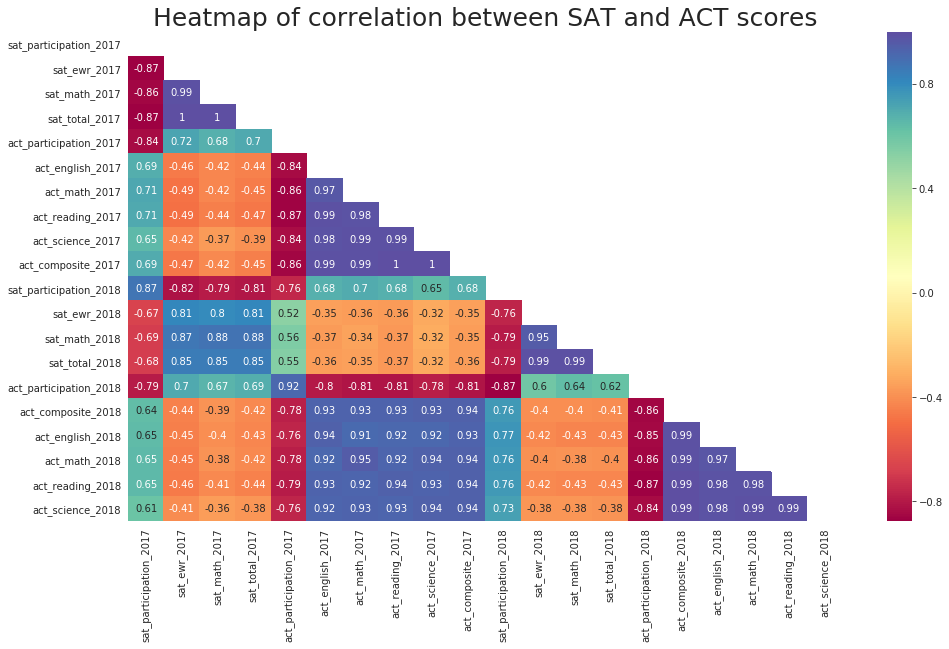

In [63]:
plt.figure(figsize=(16,9))

mask = np.zeros_like(final.corr())
#mask 
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(final.corr(),mask=mask, annot=True,cmap='Spectral') 
    ax.set_title("Heatmap of correlation between SAT and ACT scores", fontsize=25);


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [64]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,main_title):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,15),sharex=False,sharey=True) #specifying figsize
    fig.suptitle(main_title)
    ax = ax.ravel()                                  # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):        # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])                # feel free to add more settings
                                                  # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel(list_of_xlabels, fontsize=12)
        ax[i].set_ylabel("Number of States", fontsize=12)
        ax[i].axvline(np.mean(dataframe[column]), color='maroon', linestyle='--', lw=1); #set the mean line

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

***Participation rates for SAT & ACT in 2017 and 2018***

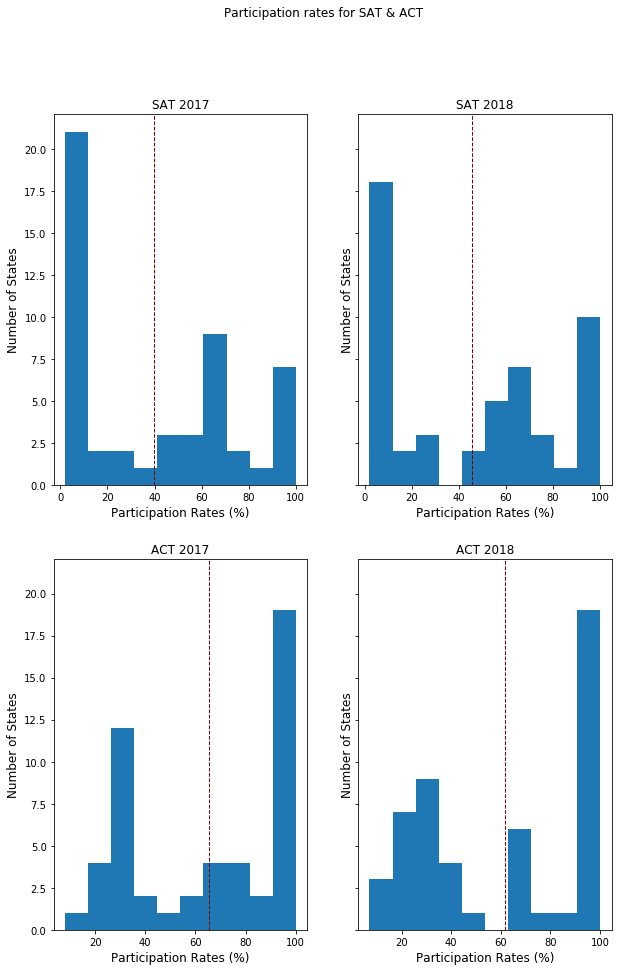

In [65]:
#Participation rates for SAT & ACT
subplot_histograms(final, ["sat_participation_2017", "sat_participation_2018", "act_participation_2017", 
                           "act_participation_2018"], ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], 
                   "Participation Rates (%)","Participation rates for SAT & ACT")

> ***It is noted that the distribution are not normal. It is observed that some of the plots are bimodal distributed.***

***Math Score for SAT and ACT for both 2017 and 2018***

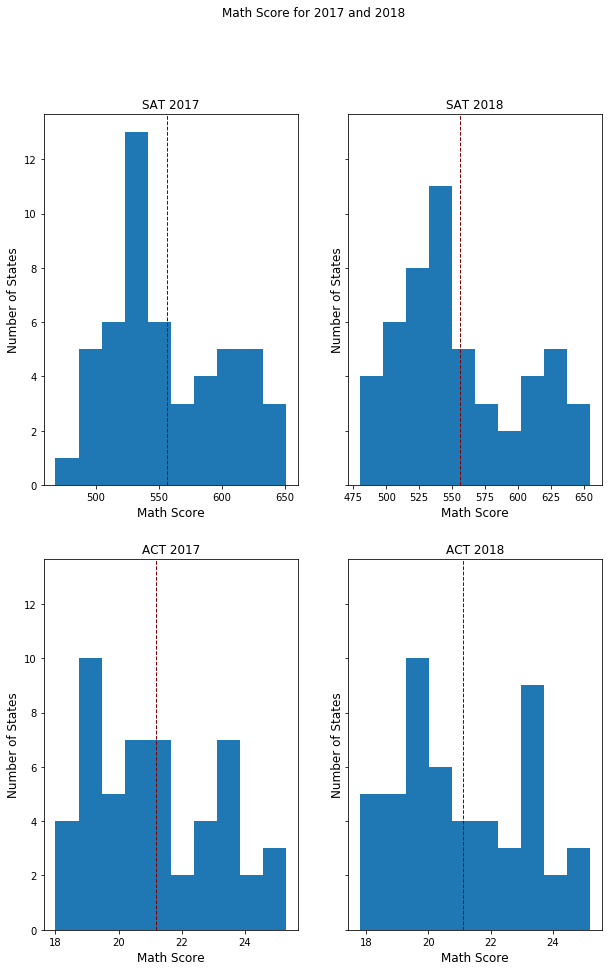

In [66]:
# Code
#Participation rates for SAT & ACT
subplot_histograms(final, ["sat_math_2017", "sat_math_2018", "act_math_2017", "act_math_2018"],
                   ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], 
                   "Math Score",
                  "Math Score for 2017 and 2018")


> ***It is noted that the distribution are not normal. It is observed that some of the plots are bimodal distributed.***

***English/Reading scores for SAT and ACT in 2017 and 2018***

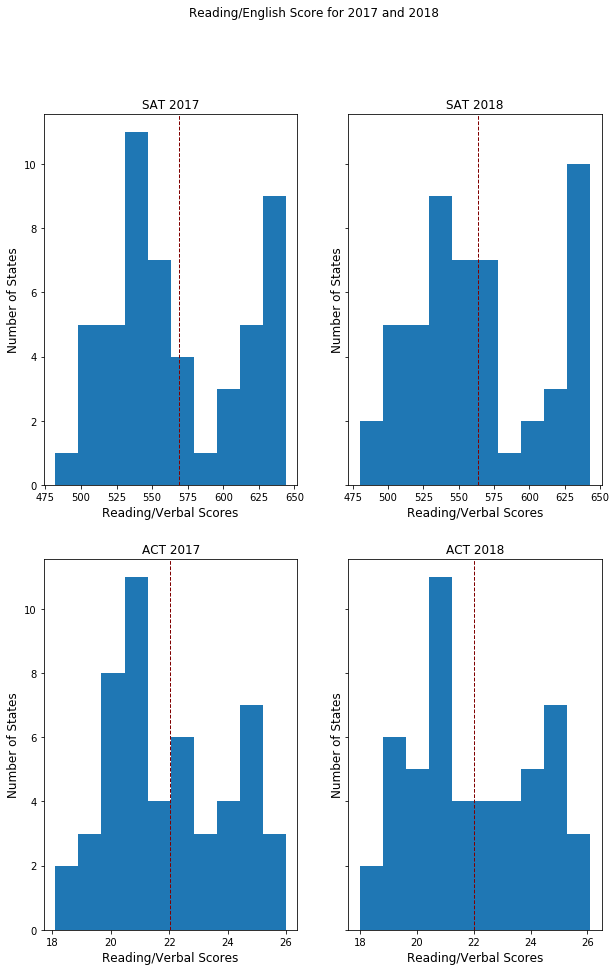

In [67]:
#English/Reading Score scores for SAT & ACT
subplot_histograms(final, ["sat_ewr_2017", "sat_ewr_2018", "act_reading_2017", "act_reading_2018"], 
                   ["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"], 
                   "Reading/Verbal Scores","Reading/English Score for 2017 and 2018")


> ***It is noted that the distribution are not normal. It is observed that some of the plots are bimodal distributed.***

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


The correlation values between SAT and ACT Math in 2017 for SAT is : -0.42


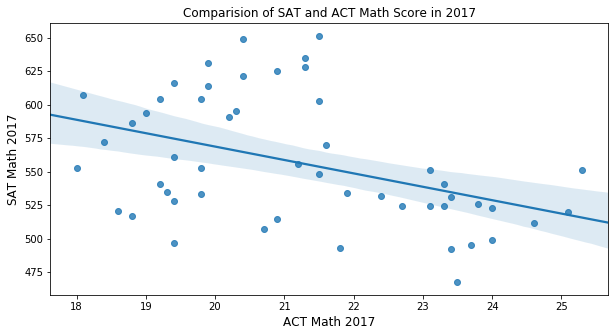

In [68]:
#code
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='sat_math_2017',x='act_math_2017', data=final[['sat_math_2017','act_math_2017']])
ax.set_title('Comparision of SAT and ACT Math Score in 2017',fontsize= 12)
ax.set_ylabel('SAT Math 2017', fontsize= 12)
ax.set_xlabel('ACT Math 2017',fontsize=12)

corr_value= final['sat_math_2017'].corr(final['act_math_2017'])
print('\033[1m'+'The correlation values between SAT and ACT Math in 2017 for SAT is : %.2f'%corr_value)

The correlation values between SAT and ACT English/Reading in 2017 for SAT is : -0.49


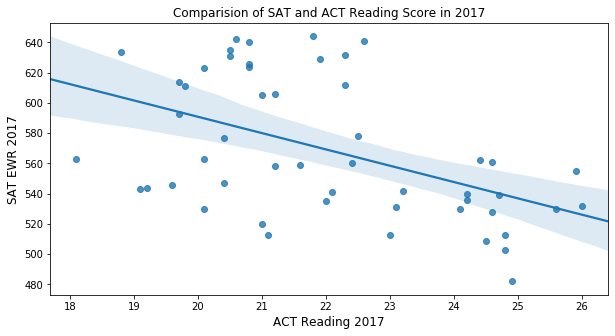

In [69]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='sat_ewr_2017',x='act_reading_2017', data=final[['sat_ewr_2017','act_reading_2017']])
ax.set_title('Comparision of SAT and ACT Reading Score in 2017',fontsize= 12)
ax.set_ylabel('SAT EWR 2017', fontsize= 12)
ax.set_xlabel('ACT Reading 2017',fontsize=12)
corr_value= final['sat_ewr_2017'].corr(final['act_reading_2017'])
print('\033[1m'+'The correlation values between SAT and ACT English/Reading in 2017 for SAT is : %.2f'%corr_value)

The correlation values between SAT and ACT Total/Composite Score in 2017 for SAT is : -0.45


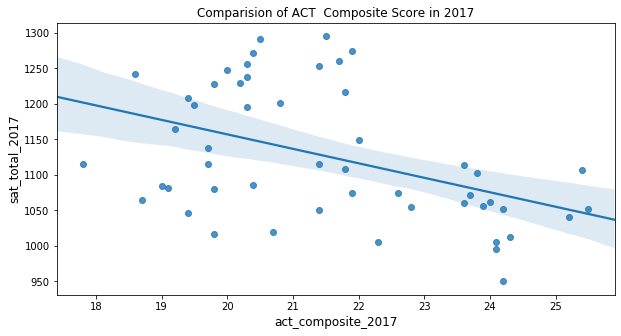

In [70]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='sat_total_2017',x='act_composite_2017', data=final[['sat_total_2017','act_composite_2017']])
ax.set_title('Comparision of ACT  Composite Score in 2017',fontsize= 12)
ax.set_ylabel('sat_total_2017', fontsize= 12)
ax.set_xlabel('act_composite_2017',fontsize=12);
corr_value= final['sat_total_2017'].corr(final['act_composite_2017'])
print('\033[1m'+'The correlation values between SAT and ACT Total/Composite Score in 2017 for SAT is : %.2f'%corr_value)

The correlation values between SAT Total Score in 2017 and 2018 for SAT is : 0.85


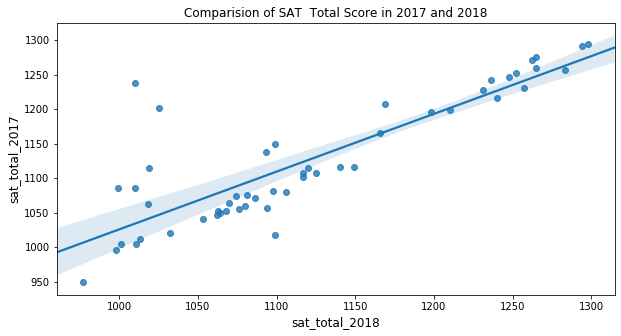

In [71]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='sat_total_2017',x='sat_total_2018', data=final[['sat_total_2017','sat_total_2018']])
ax.set_title('Comparision of SAT  Total Score in 2017 and 2018',fontsize= 12)
ax.set_ylabel('sat_total_2017', fontsize= 12)
ax.set_xlabel('sat_total_2018',fontsize=12);
corr_value= final['sat_total_2017'].corr(final['sat_total_2018'])
print('\033[1m'+'The correlation values between SAT Total Score in 2017 and 2018 for SAT is : %.2f'%corr_value)

The correlation values between ACT Composite Score in 2017 and 2018 for SAT is : 0.94


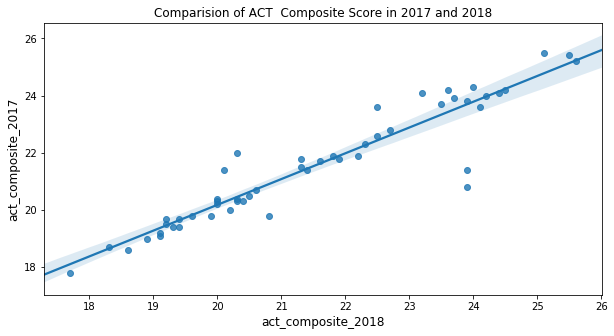

In [72]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='act_composite_2017',x='act_composite_2018', data=final[['act_composite_2017','act_composite_2018']])
ax.set_title('Comparision of ACT  Composite Score in 2017 and 2018',fontsize= 12)
ax.set_ylabel('act_composite_2017', fontsize= 12)
ax.set_xlabel('act_composite_2018',fontsize=12);
corr_value= final['act_composite_2017'].corr(final['act_composite_2018'])
print('\033[1m'+'The correlation values between ACT Composite Score in 2017 and 2018 for SAT is : %.2f'%corr_value)

The correlation values between SAT participation rate in 2017 and 2018 for SAT is : 0.87


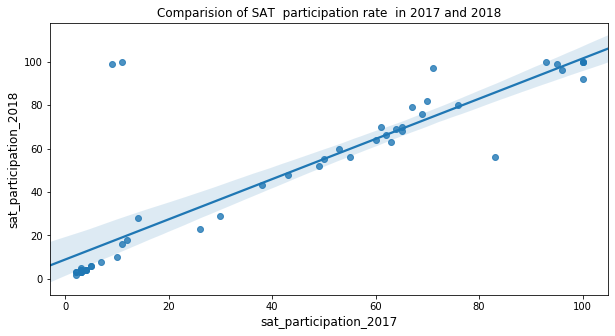

In [73]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='sat_participation_2018',x='sat_participation_2017', data=final[['sat_participation_2018','sat_participation_2017']])
ax.set_title('Comparision of SAT  participation rate  in 2017 and 2018',fontsize= 12)
ax.set_ylabel('sat_participation_2018', fontsize= 12)
ax.set_xlabel('sat_participation_2017',fontsize=12);
corr_value= final['sat_participation_2018'].corr(final['sat_participation_2017'])
print('\033[1m'+'The correlation values between SAT participation rate in 2017 and 2018 for SAT is : %.2f'%corr_value)

The correlation values between ACT participation rate in 2017 and 2018 for SAT is : 0.92


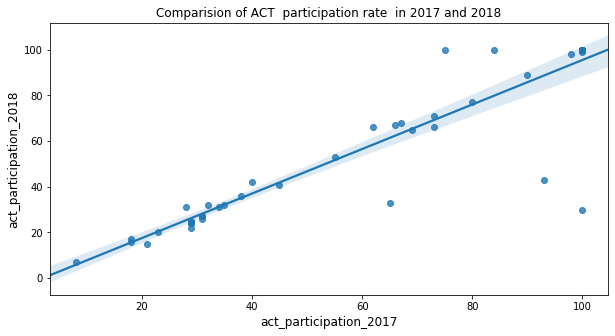

In [74]:
ax=plt.subplots(figsize=(10,5))
ax=sns.regplot(y='act_participation_2018',x='act_participation_2017', data=final[['act_participation_2017','act_participation_2018']])
ax.set_title('Comparision of ACT  participation rate  in 2017 and 2018',fontsize= 12)
ax.set_ylabel('act_participation_2018', fontsize= 12)
ax.set_xlabel('act_participation_2017',fontsize=12);
corr_value= final['act_participation_2017'].corr(final['act_participation_2018'])
print('\033[1m'+'The correlation values between ACT participation rate in 2017 and 2018 for SAT is : %.2f'%corr_value)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

***ACT Science score***

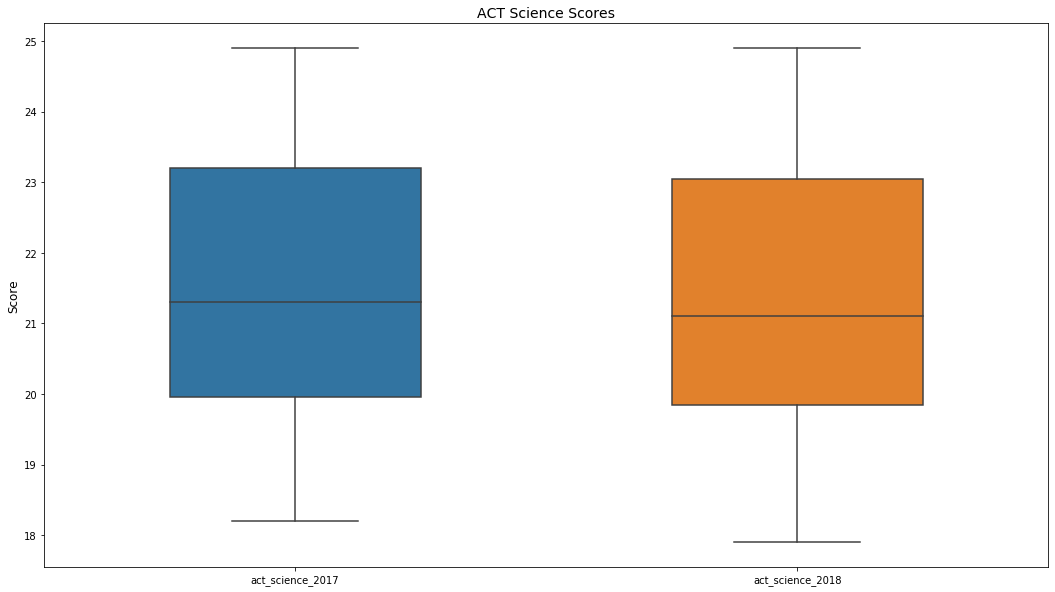

In [75]:
ax= plt.subplots(figsize=(18,10))
plt.title('ACT Science Scores',fontsize=14)
plt.ylabel('Score',fontsize=12)
use=final[['act_science_2017','act_science_2018']]
sns.boxplot(data=use, width=0.5);

><b>There is a fall in median score in Math from 2017 to 2018. It is also oberserved that there is an outlier 'Maryland' which score fairly low of 2.3. This was discovered that there was an error in data and was corrected to be 23.2 On the general, there is a fall in median score from 2017 to 2018.</b>


***ACT English/Reading score***

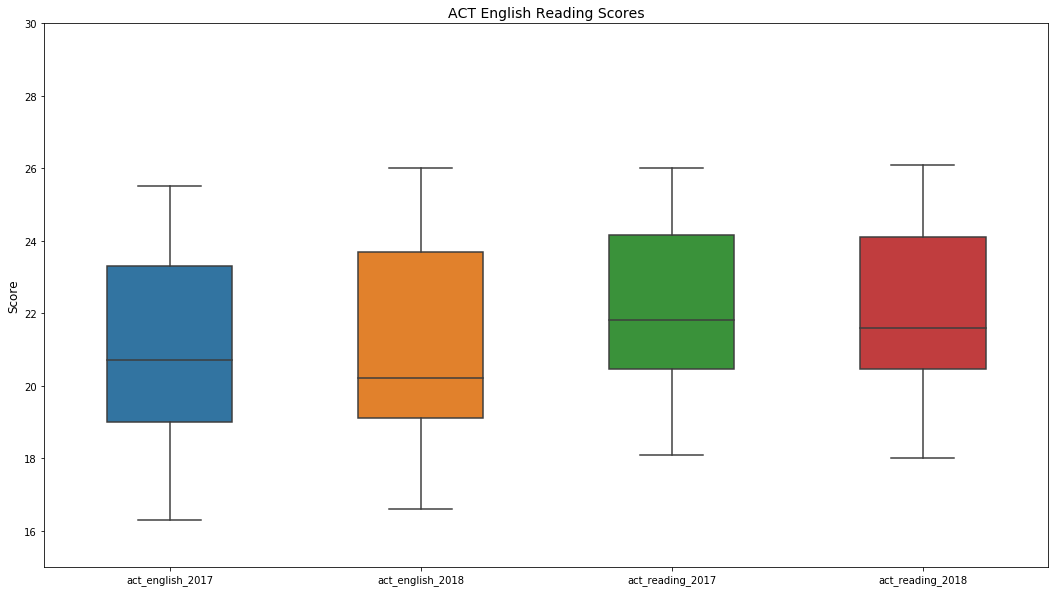

In [76]:
ax= plt.subplots(figsize=(18,10))
plt.title('ACT English Reading Scores',fontsize=14)
plt.ylabel('Score',fontsize=12)
plt.ylim(15,30)

use=final[['act_english_2017','act_english_2018','act_reading_2017','act_reading_2018']]
sns.boxplot(data=use, width=0.5);

><b>Referencing to correlation heatmap, there seemed to be a strong correlation between ACT English and ACT Reading.
From the above boxplot, the students score better in Reading compared to English which has a higher median score.<br>On an overview, there is a dip in results between 2017 and 2018 for ACT scores.</br></b>

***ACT Math score***

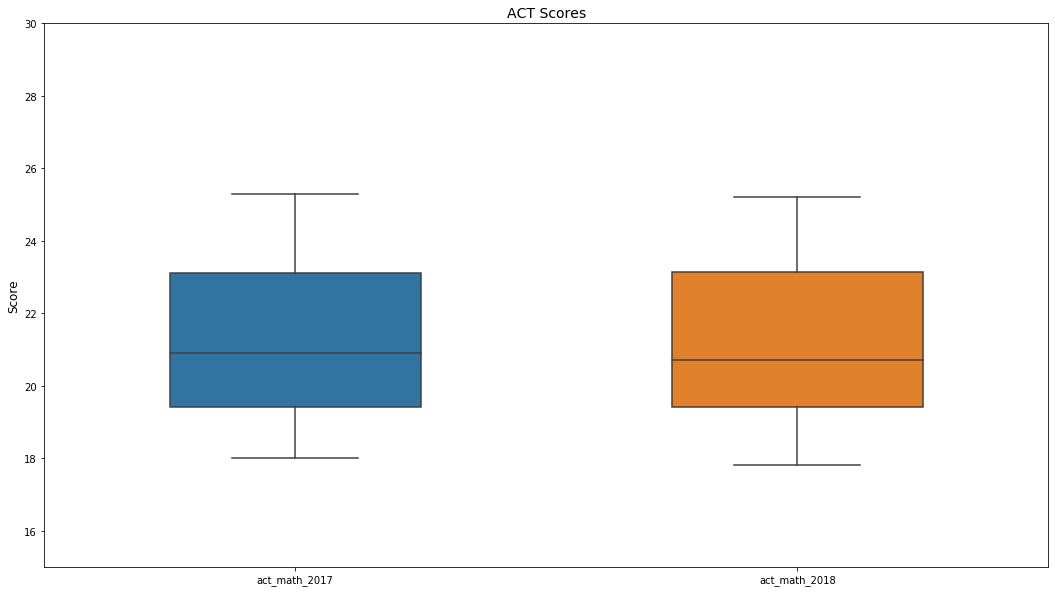

In [77]:
# Code
ax= plt.subplots(figsize=(18,10))
plt.title('ACT Scores',fontsize=14)
plt.ylabel('Score',fontsize=12)
plt.ylim(15,30)

use=final[['act_math_2017','act_math_2018']]
sns.boxplot(data=use, width=0.5);

>***The ACT Math median score seems to dip comparing from 2017 to 2018.***

***ACT Composite Score***

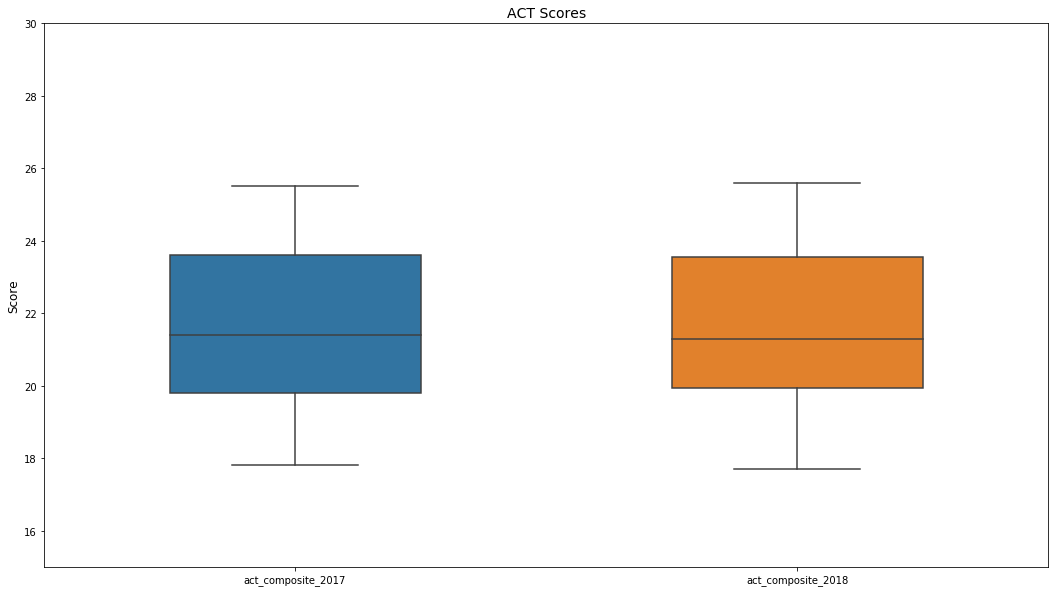

In [78]:
ax= plt.subplots(figsize=(18,10))
plt.title('ACT Scores',fontsize=14)
plt.ylabel('Score',fontsize=12)
plt.ylim(15,30)

use=final[['act_composite_2017','act_composite_2018']]
sns.boxplot(data=use, width=0.5);

><b>The ACT composite scores are observed to be fairly similar from year to year. </b>

***SAT  EWR and Math score***

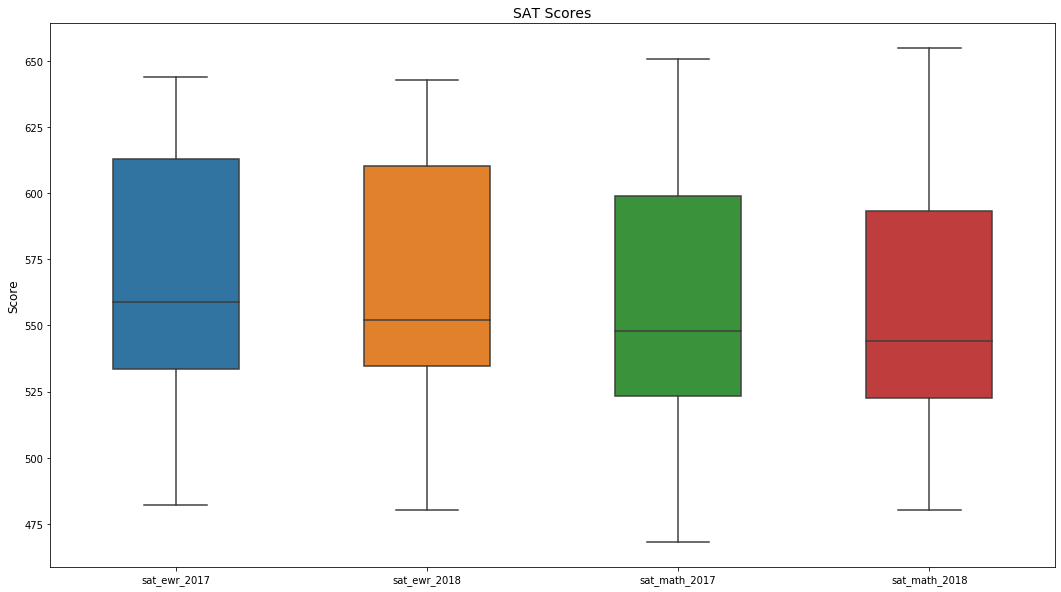

In [79]:
ax= plt.subplots(figsize=(18,10))
plt.title('SAT Scores',fontsize=14)
plt.ylabel('Score',fontsize=12)

sat_use=final[['sat_ewr_2017','sat_ewr_2018','sat_math_2017','sat_math_2018']]
sns.boxplot(data=sat_use, width=0.5);

>***For both EWR and Math, it is observed that there is a dip in score based on the median for 2017 and 2018.***

***SAT Total score in 2017 and 2018***

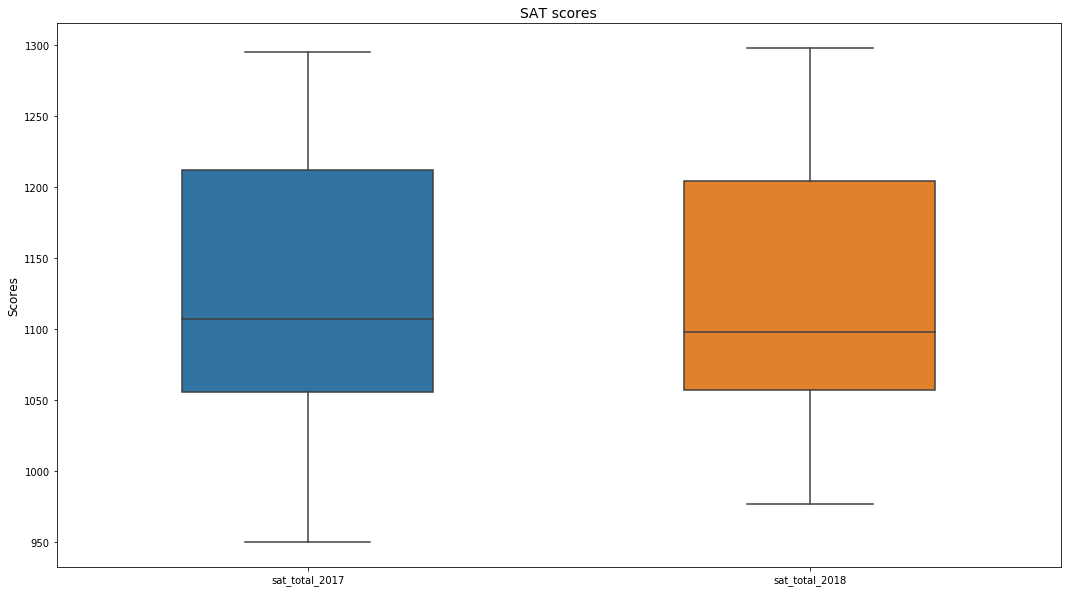

In [80]:
ax= plt.subplots(figsize=(18,10))
plt.title('SAT scores',fontsize=14)
plt.ylabel('Scores',fontsize=12)

participation_use=final[['sat_total_2017','sat_total_2018']]
sns.boxplot(data=participation_use, width=0.5);

><b> It is observed that there is a dip in median score SAT total score between 2017 and 2018.  </b>

***ACT and SAT participation rates comparison in 2017 and 2018***

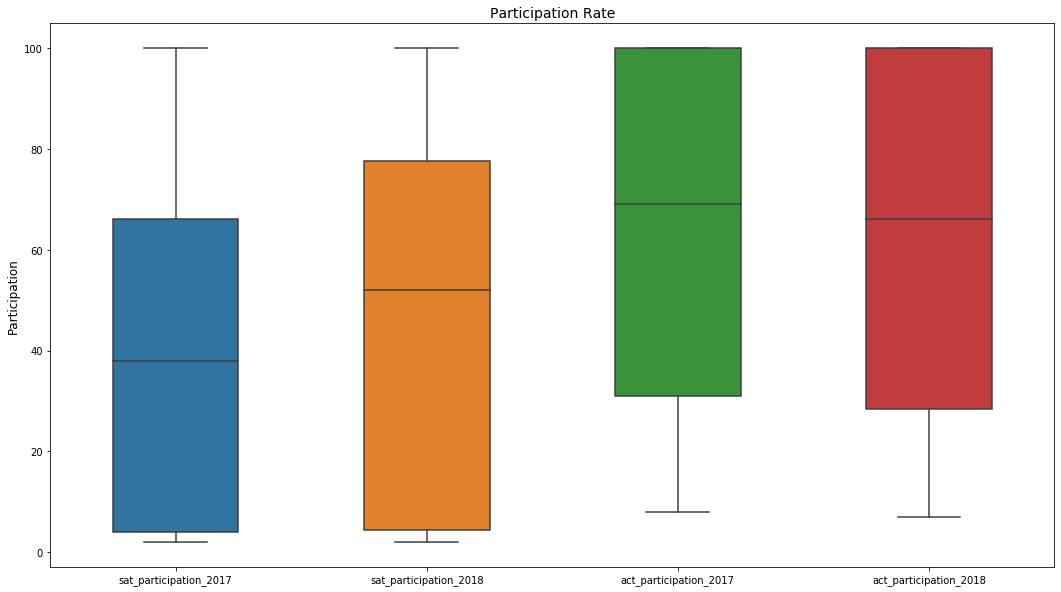

In [81]:
ax= plt.subplots(figsize=(18,10))
plt.title('Participation Rate',fontsize=14)
plt.ylabel('Participation',fontsize=12)

participation_use=final[['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']]
sns.boxplot(data=participation_use, width=0.5);

><b> It is noted that SAT participation rate has grown significantly between 2017 and 2018. Meanwhile, for ACT there shows a dip in participation rate in the same period. For SAT participation 2017, it is obvious that the distribution is skewed right.  </b>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

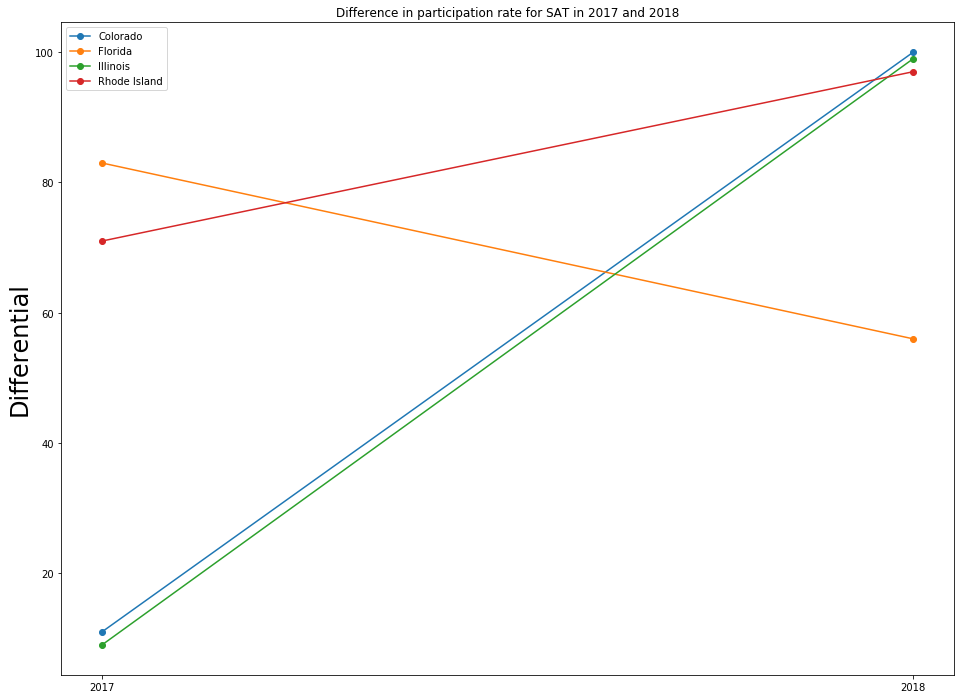

In [90]:
## plotting line graph of difference in participation to enhance visualisation 

#filtering >20% change

plt.figure(figsize=(16, 12))

for i in list(final.index):
    if abs(final[final.index == i]['sat_participation_2017'].iloc[0] - final[final.index == i]['sat_participation_2018'].iloc[0]) >=20:
        plt.plot([str(2017),str(2018)],
                 [final[final.index == i]['sat_participation_2017'].iloc[0],final[final.index == i]['sat_participation_2018'].iloc[0]],
                 marker='o',
                 label = i)
plt.title("Difference in participation rate for SAT in 2017 and 2018")
plt.legend(loc = 'best')
plt.ylabel("Differential", fontsize = 24)
plt.savefig('../Image/slope.png');

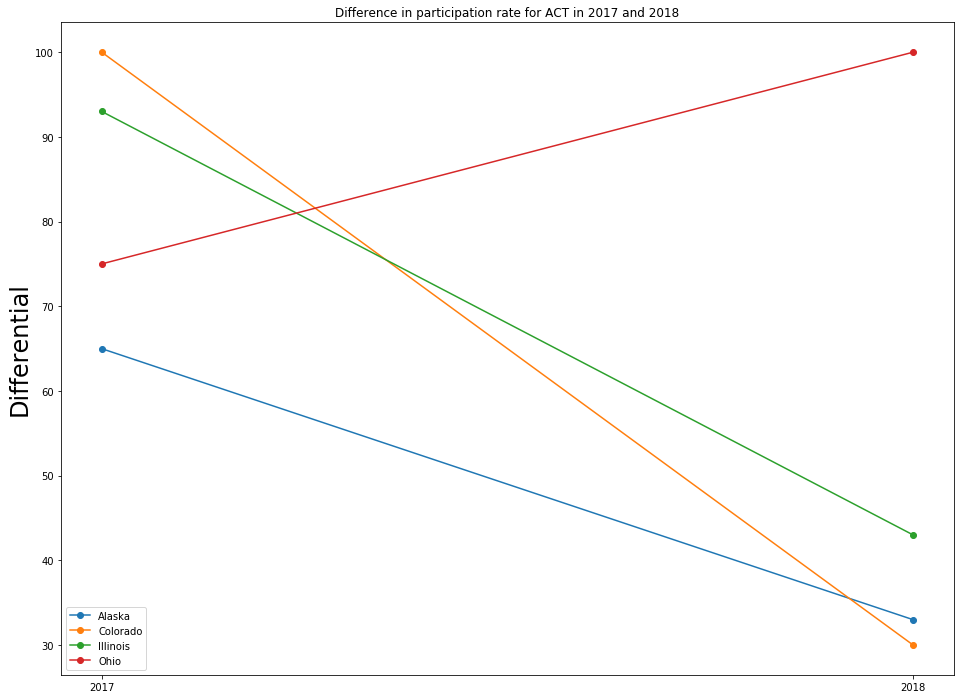

In [83]:
## plotting line graph of difference in participation to enhance visualisation 

#filtering >20% change

plt.figure(figsize=(16, 12))

for i in list(final.index):
    if abs(final[final.index == i]['act_participation_2017'].iloc[0] - final[final.index == i]['act_participation_2018'].iloc[0]) >=20:
        plt.plot([str(2017),str(2018)],
                 [final[final.index == i]['act_participation_2017'].iloc[0],final[final.index == i]['act_participation_2018'].iloc[0]],
                 marker='o',
                 label = i)
plt.title("Difference in participation rate for ACT in 2017 and 2018")
plt.legend(loc = 'best')
plt.ylabel("Differential", fontsize = 24);

In [84]:
#using plotly to try out interactive charts.
# trying out using ploty for learning purpose.
#refer to Tableau images
#first create a dictionary of states abbreviation since plotly accepts only states abbreviations
#secondly create an empty column call code
#thirdly map the state into the code

final['code']=final.apply(lambda _: "",axis=1)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
final['code'] = final.index.map(lambda x: us_state_abbrev[x])


In [85]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=final['code'], # Spatial coordinates
    z = final['sat_participation_2017'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'OrRd',
    colorbar_title = "Participation Rate",
))

fig.update_layout(
    title_text = 'SAT Participation by States in 2017',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

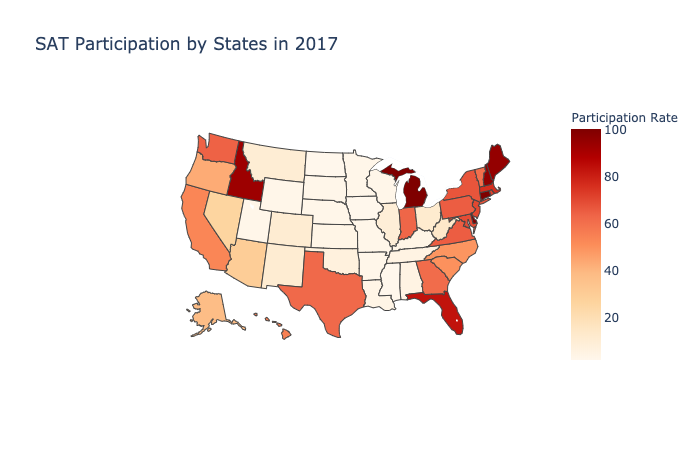

In [86]:
from IPython.display import Image
Image("../Image/plotly_sat_2017.png")

In [87]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=final['code'], # Spatial coordinates
    z = final['sat_participation_2018'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'OrRd',
    colorbar_title = "Participation Rate",
))

fig.update_layout(
    title_text = ' SAT Participation by States in 2018',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

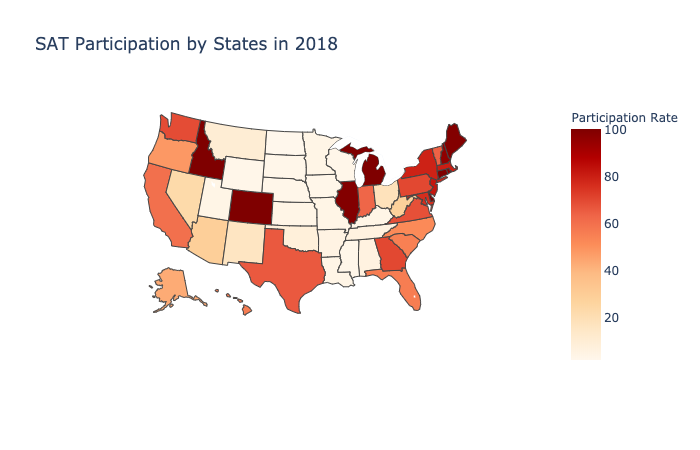

In [88]:
from IPython.display import Image
Image("../Image/plotly_sat_2018.png")

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

>Interestingly, SAT are more popular in coastal states based on the participation map we have plotted.
We are interested to have an overview on participation rate across states, therefore we have only mapped out for participation variable for SAT and ACT.
>Through the choropleth map, we could identify individual state which has shown significant changes for SAT and ACT between 2017 and 2018.
>For SAT Participation: Colorado, Illinois big swing on Year-To-Year
>For ACT Participation: Colorado, Illinois big swing on Year-To-Year

![SAT_participation 2017](../Image/SAT_participation_2017.png)


![SAT_participation 2018](../Image/SAT_participation_2018.png)


![ACT_participation 2017](../Image/ACT_participation_2017.png)


![ACT_participation 2018](../Image/ACT_participation_2018.png)


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [89]:
final.describe().T

count         mean        std    min      25%     50%  \
sat_participation_2017   51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_ewr_2017             51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_math_2017            51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_total_2017           51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
act_participation_2017   51.0    65.254902  32.140842    8.0    31.00    69.0   
act_english_2017         51.0    20.931373   2.353677   16.3    19.00    20.7   
act_math_2017            51.0    21.182353   1.981989   18.0    19.40    20.9   
act_reading_2017         51.0    22.013725   2.067271   18.1    20.45    21.8   
act_science_2017         51.0    21.450980   1.739353   18.2    19.95    21.3   
act_composite_2017       51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_participation_2018   51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_ewr_2018             51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_math_2018            51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_total_2018           51.0  1120.019608  94.155083  977.0  1057.50  1098.0   
act_participation_2018   51.0    61.647059  34.080976    7.0    28.50    66.0   
act_composite_2018       51.0    21.486275   2.106278   17.7    19.95    21.3   
act_english_2018         51.0    20.988235   2.446356   16.6    19.10    20.2   
act_math_2018            51.0    21.125490   2.035765   17.8    19.40    20.7   
act_reading_2018         51.0    22.015686   2.167245   18.0    20.45    21.6   
act_science_2018         51.0    21.345098   1.870114   17.9    19.85    21.1   

                            75%     max  
sat_participation_2017    66.00   100.0  
sat_ewr_2017             613.00   644.0  
sat_math_2017            599.00   651.0  
sat_total_2017          1212.00  1295.0  
act_participation_2017   100.00   100.0  
act_english_2017          23.30    25.5  
act_math_2017             23.10    25.3  
act_reading_2017          24.15    26.0  
act_science_2017          23.20    24.9  
act_composite_2017        23.60    25.5  
sat_participation_2018    77.50   100.0  
sat_ewr_2018             610.50   643.0  
sat_math_2018            593.50   655.0  
sat_total_2018          1204.00  1298.0  
act_participation_2018   100.00   100.0  
act_composite_2018        23.55    25.6  
act_english_2018          23.70    26.0  
act_math_2018             23.15    25.2  
act_reading_2018          24.10    26.1  
act_science_2018          23.05    24.9

>***Participation Rate***
> <p>Referencing  participation rates for both 2017 and 2018, the SAT participation rate has increase in comparison from 2017 to 2018. However, based on the median total score for SAT, it has dipped from 2017 to 2018. For SAT 2018 is noticeably skewed to the left with a wider spread.  As previously in histogram,  it was noted that the histogram are not normally distributed, in spite of the symmetrical boxplots.</p>
>
>
>***English Score***
><p>
The Reading/Verbal (ERW) scores are not normally distributed. SAT ERW scores maintain similar mean in 2017 and 2018 and median across the two years, and are slightly skewed to the right. The mean is also slightly above the median for both years. The spread is quite narrow.
ACT Reading scores also maintain similar mean, median  and spread across the two years, and also slightly skewed to the right. 
</p>


>***Math Score***
><p>For SAT, the mean and median are similar for both years. The spread is relatively narrow and suggested that it is skewed to the left.

>For ACT, mean  and median also remain similar between the two years. The spread is relatively narrow, and more symmetrical compared to the spread in SAT. As with the SAT, the mean for each year's ACT Math score lies above the median, but is much closer to the median.
></p>
>
>***Science Score***
><p>For both years , ACT Science scores are quite narrow and symmetrical, though the 2018 scores have a slightly wider spread. In 2017, the mean was below the median and in 2018, the mean was overlapping with the median.
></p>

>***Total/Composite Score***
><p>On the overview, it was observed that as the participation rate increases, the average Total/Composite score decreases.
</p>



#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
> Based on the histogram, it does not follow a normal distribution. The IQR for participation rate for ACT and SAT,
>there seems to have variance in the datas. Since we do not know the actual sample size per state, it is relatively difficult to understand and provide estimates for the population. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

> Based on my observation for Math, Reading and Rates, the distribution do not follow a normal distribution. They seem to be like Bimodal distribution. 
> In order to make estimates, we may need to apply other methods to derive the estimates (e.g.Bayesian methods)


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

> No, since we do not know the actual sample size per state, it is relatively difficult to understand and provide estimates for the population. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

>Similar to the example for participation, The graph also shows that it is not normally distributed. Adding to the fact, the way ACT and SAT scale their maths score is different. It is not possible conduct statistical inference from the math score.
>
>
>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

<b>Answer:</b>

><p> No, I do not think it is appropriate to perform hypothesis testing since we are not aware of the sample size and population size.</p>

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

> ***There are a few states which we have observed significant growth rate for participation of SAT from 2017 to 2018. Some of these states are Colorado, Illinois and Rhode Island. <p>Below are the information gathered on the possible causes for the increase:</p>***
>
> Colorado juniors face new, revamped college exam in SAT after state dumps rival ACT.
 Khan Academy is teaming with the College Board, the makers of the SAT, to provide free and personalized SAT study courses for Colorado students.
<br>[Source: https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/</br>]
>
> Illinois moves ahead with new testing plan, replacing ACT with SAT
 <br>Sources: [https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html</br>]
>
> With SAT required, R.I. sees jump in participation, decline in scores
<br> Source: [https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores</br>]


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

>It is also noted that as the participation rate increases, the average total score/composite decrease. One of the state which have a lower participation rate in SAT is ***Ohio and Tennessee***. They are one of the states which have yet to legistrate which test to adopt, it is recommend that the College Board to step up the following activities to enhance participation rates for SAT in states which do not have manadatory requirements to take ACT.

><br>1) Influence state school districts to include PSAT for high school juniors  
</br>
><br>2) Partner with more education enterprise to create sat awareness in high schools
</br>
><br>3) Bursary and Fee waivers to cover test costs: lower entry barrier for lower-income students
</br>
><br>4) Introduce PSAT(Preliminary SAT) for junior school students to prepare them for SAT examination</br>
><br>5) Create more workshops and talks on sat to showcase success stories of SAT</br>



>To further stregthen our investigation on participation rates of students,we may look into  additional data that could be interesting to explore are candidate information such median income of household and which states provide subsidy for student take either test. In addition, there are states which have legistrated mandatory requirement of either of the tests system and whether the state government fund these tests. All these details will be also be factors which affect how students make their decisions.
><p>Additional Data Sources:
<br>US Median Household Income and Ethnicity, by State: US Census[https://www.census.gov/topics/income-poverty/income/data/tables.html]</br>

>States offering public funding/where SAT or ACT is mandatory: [https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat]
</p>




